In [101]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as con

In [102]:
#Importing data from file
data = np.genfromtxt('data/obj5.data')

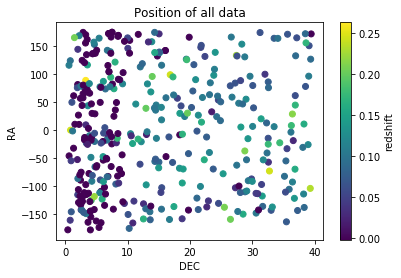

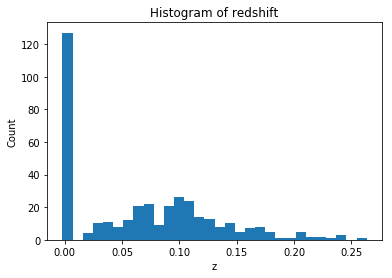

In [103]:
#Plotting data position
plt.scatter(data[:,1], data[:,2], c = data[:,3])
plt.xlabel('DEC')
plt.ylabel('RA')
plt.title('Position of all data')
c_bar = plt.colorbar()
c_bar.ax.set_ylabel('redshift')
plt.show()

#Plotting a histogram of redshift
plt.hist(data[:,3], bins = 30)
plt.xlabel('z')
plt.ylabel('Count')
plt.title('Histogram of redshift')
plt.show()

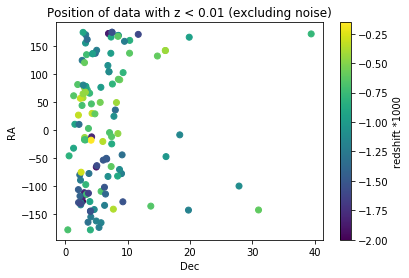

In [104]:
'''Since there is clearly a sharp spike around very low redshift, we assume that this is the relevant data
and the rest is noise. This is supported by the fact that the low-redshift data is localised in space
whereas the rest is spread out across the field.'''

#Creating a data set using only low-redshift data
wantedx = []

for i in range(len(data[:,1])):
    if data[i,3]<= 0.01:
        wantedx.append(i)
        
wantedx = np.array(wantedx)
newdatax = data[wantedx,:]

#Plotting the reduced data set
plt.scatter(newdatax[:,1], newdatax[:,2], c = newdatax[:,3]*1000)
plt.xlabel('Dec')
plt.ylabel('RA')
c_bar = plt.colorbar()
c_bar.ax.set_ylabel('redshift *1000')
plt.title('Position of data with z < 0.01 (excluding noise)')
plt.show()

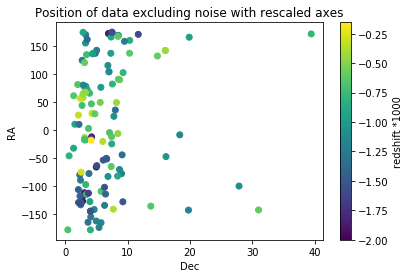

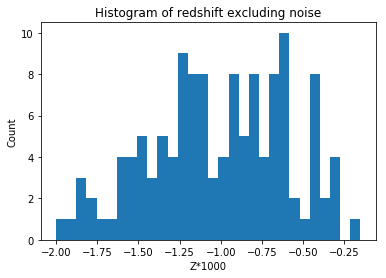

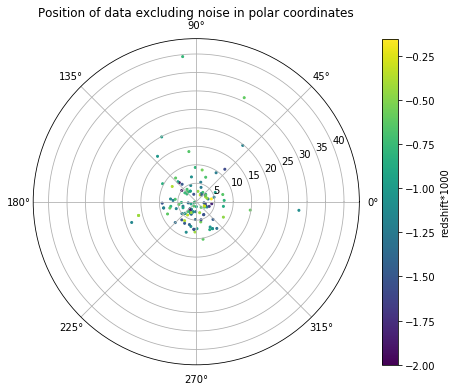

In [105]:
'''Since this data set is mostly localised within 0<Dec<11,
we remove the values outside this range as outliers.'''

#Creating a data set using only data with Dec <11
wanted = []

for i in range(len(data[:,1])):
    if data[i,3]<= 0.01: # and data[i,1]<=11:
        wanted.append(i)
        
wanted = np.array(wanted)
newdata = data[wanted,:]

#Plotting the reduced data set in space
plt.scatter(newdata[:,1], newdata[:,2], c = newdata[:,3]*1000)
plt.xlabel('Dec')
plt.ylabel('RA')
c_bar = plt.colorbar()
c_bar.ax.set_ylabel('redshift *1000')
plt.title('Position of data excluding noise with rescaled axes')
plt.show()

#Histogram of the redshifts of the reduced data set
plt.hist(newdata[:,3]*1000, bins=30)
plt.xlabel('Z*1000')
plt.ylabel('Count')
plt.title('Histogram of redshift excluding noise')
plt.show()

#Plot of the data locations in polar coordinates
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(newdata[:,2], newdata[:,1], c=newdata[:,3]*1000, s = 4)
color_bar= fig.colorbar(c)
color_bar.ax.set_ylabel('redshift*1000')
plt.title('Position of data excluding noise in polar coordinates')
plt.show()

In [106]:
def redshift_to_kps(z):
    #This function takes redshift and returns the recession velocity in km/sec
    return z*con.c.to(u.km/u.s)

In [107]:
'''Since there is no obvious space-redshift relation from looking at the data,
we assume that the velocity is dispersion-supported.'''

#Finding the average recession speed of the body in km/s
avg_redshift= np.average(newdata[:,3])
print('z = ' + str(avg_redshift))
print('recession speed= ' +str(redshift_to_kps(avg_redshift)))

'''The body is moving towards us at 308 km/s. This means that its Doppler shift due to peculiar motion
dominates its cosmological redshift, and its distance cannot be measured via cosmological means, unless we had a standard ruler.'''

z = -0.0010096456692913387
recession speed= -302.6841569059055 km / s


'The body is moving towards us at 308 km/s. This means that its Doppler shift due to peculiar motion\ndominates its cosmological redshift, and its distance cannot be measured via cosmological means, unless we had a standard ruler.'

In [108]:
#Finding the velocity dispersion of the body in km/s
std_dev = np.std(newdata[:,3])
print('redshift standard deviation = ' + str(std_dev))
print('velocity dispersion= ' + str(redshift_to_kps(std_dev)))

'''The velocity dispersion of about 126 km/s suggests that the body is at least on the scale of a galaxy.
The object's angular size (with angular radius of 11 degrees) suggests that it is on the scale of a galaxy group or cluster.'''

redshift standard deviation = 0.00041481290254268927
velocity dispersion= 124.35777966338726 km / s


"The velocity dispersion of about 126 km/s suggests that the body is at least on the scale of a galaxy.\nThe object's angular size (with angular radius of 11 degrees) suggests that it is on the scale of a galaxy group or cluster."